In [1]:
%pip install imblearn
%pip install seaborn
%pip install yellowbrick

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 7.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 8.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
data = pd.read_csv("학생건강검사_2022년_원자료(극단치제거).csv")
#file read test 코드입니다.

/tmp/ipykernel_5675/2815796392.py:9: DtypeWarning: Columns (43,46,49) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("학생건강검사_2022년_원자료(극단치제거).csv")


학년 특성만 추출하여 읽은 데이터에서 가장 빈도가 높은 학년을 시각화하여 분석

data['학년'].value_counts()는 데이터에서 '학년' 열의 각 값들의 빈도를 계산. 즉, 각 학년이 몇 번 등장했는지를 count

plt.figure(figsize=(10,7))는 그래프의 크기를 설정합니다. 가로로 10인치, 세로로 7인치 set

sns.barplot(x=top[:5].index,y=top[:5].values)는 seaborn 라이브러리를 사용하여 막대 그래프를 그립니다. x축에는 상위 5개의 학년을, y축에는 해당 학년의 빈도

plt.xticks(rotation=45)는 x축 눈금 라벨을 45도 각도로 회전하여 보기 편하게 만듬

plt.title('Top genres',color = 'blue')는 그래프의 제목을 설정합니다. 이 경우에는 'Top genres'로 설정되었고, 글자 색상은 파란색으로 지정되었습니다.

따라서 아래 코드를 실행하면, 데이터에서 가장 빈도가 높은 상위 5개의 학년이 막대 그래프로 시각화되며, 각 학년의 빈도를 쉽게 파악할 수 있습니다.

Text(0.5, 1.0, 'Top genres')

/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


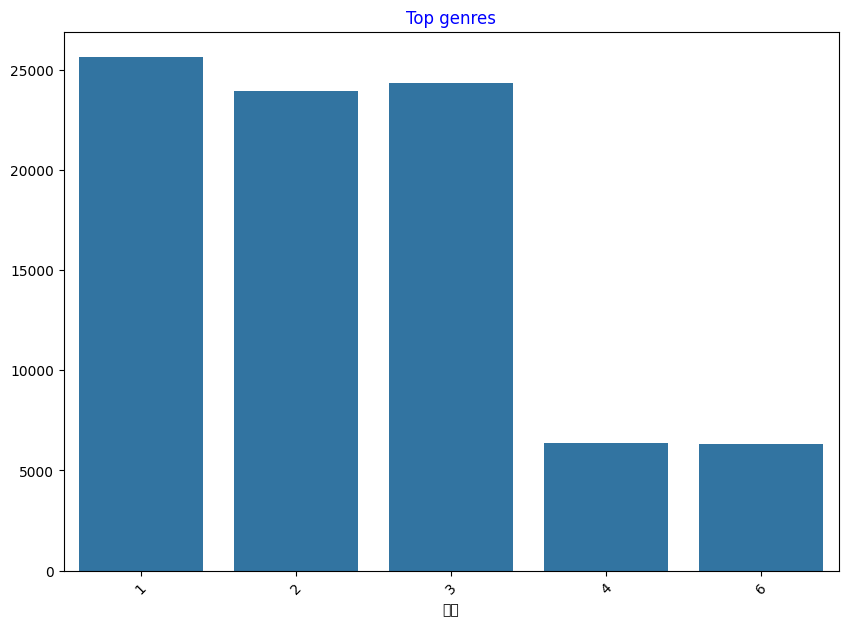

In [3]:
import seaborn as sns

top = data['학년'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top[:5].index,y=top[:5].values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

## 테스트용 2022년 데이터를 기반한 학년별 분포 분석입니다.


/tmp/ipykernel_5675/1313478630.py:9: DtypeWarning: Columns (43,46,49) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("학생건강검사_2022년_원자료(극단치제거).csv", encoding='utf-8')
/tmp/ipykernel_5675/1313478630.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['성별'] = data['성별'].replace({'여': 0, '남': 1})


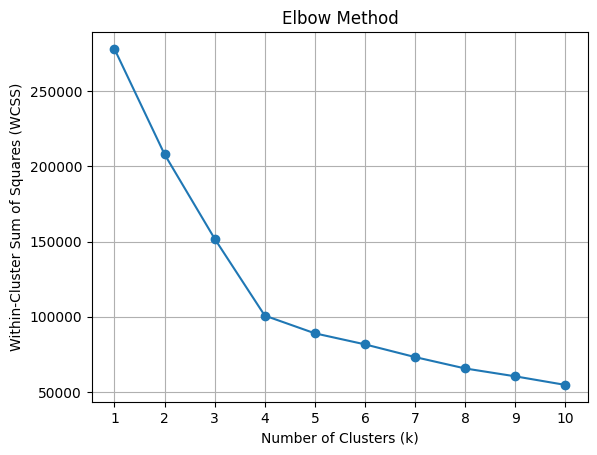

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

# 데이터 로드
data = pd.read_csv("학생건강검사_2022년_원자료(극단치제거).csv", encoding='utf-8')

# 성별을 0과 1로 변환
data['성별'] = data['성별'].replace({'여': 0, '남': 1})

# NaN 값을 최빈값으로 대체하는 SimpleImputer 객체 생성
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
data[['손씻기', '양치질']] = imputer.fit_transform(data[['손씻기', '양치질']])

# 클러스터링을 위한 특성 선택
features = data[['학년', '반', '순번']]

# 데이터 정규화
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# K-means 클러스터링을 위한 클러스터 수 범위 지정
k_values = range(1, 11)
wcss_values = []

# 각 클러스터 수에 대해 K-means 모델을 학습하고 WCSS 값을 계산
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    wcss_values.append(kmeans.inertia_)

# WCSS 그래프 그리기
plt.plot(k_values, wcss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()


위 클러스터 결과를 보면 features = data[['학년', '반', '순번']] 특성을 선택했을때,  왜곡(distortion)이 급격히 감소하는 지점 발생.
여기서 k=4에서 elbow 지점이 나타나고, elbow 지점 이후에는 감소율이 둔화되는 것으로 보입니다. 이는 클러스터 수를 4로 설정했을 때 데이터를 잘 설명할 수 있음

/tmp/ipykernel_5675/1953195711.py:10: DtypeWarning: Columns (43,46,49) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("학생건강검사_2022년_원자료(극단치제거).csv")
/tmp/ipykernel_5675/1953195711.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['성별'] = data['성별'].replace({'여': 0, '남': 1})
/tmp/ipykernel_5675/1953195711.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[['손씻기', '양치질']] = imputer.fit_transform(features[['손씻기', '양치질']])


     Cluster
학년          
1   4.208245
2   4.046761
3   3.758178
4   3.197889
5   3.596148
6   3.735472


/tmp/ipykernel_5675/1953195711.py:47: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_5675/1953195711.py:47: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_5675/1953195711.py:47: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_5675/1953195711.py:47: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_5675/1953195711.py:47: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_5675/1953195711.py:47: UserWarning: Glyph 53412 (\N{HANGUL SYLLABLE KI}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_5675/1953195711.py:47: UserWarning: Glyph 47800 (\N{HANGUL SYLLABLE MOM}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_5675/1953195711.py:47

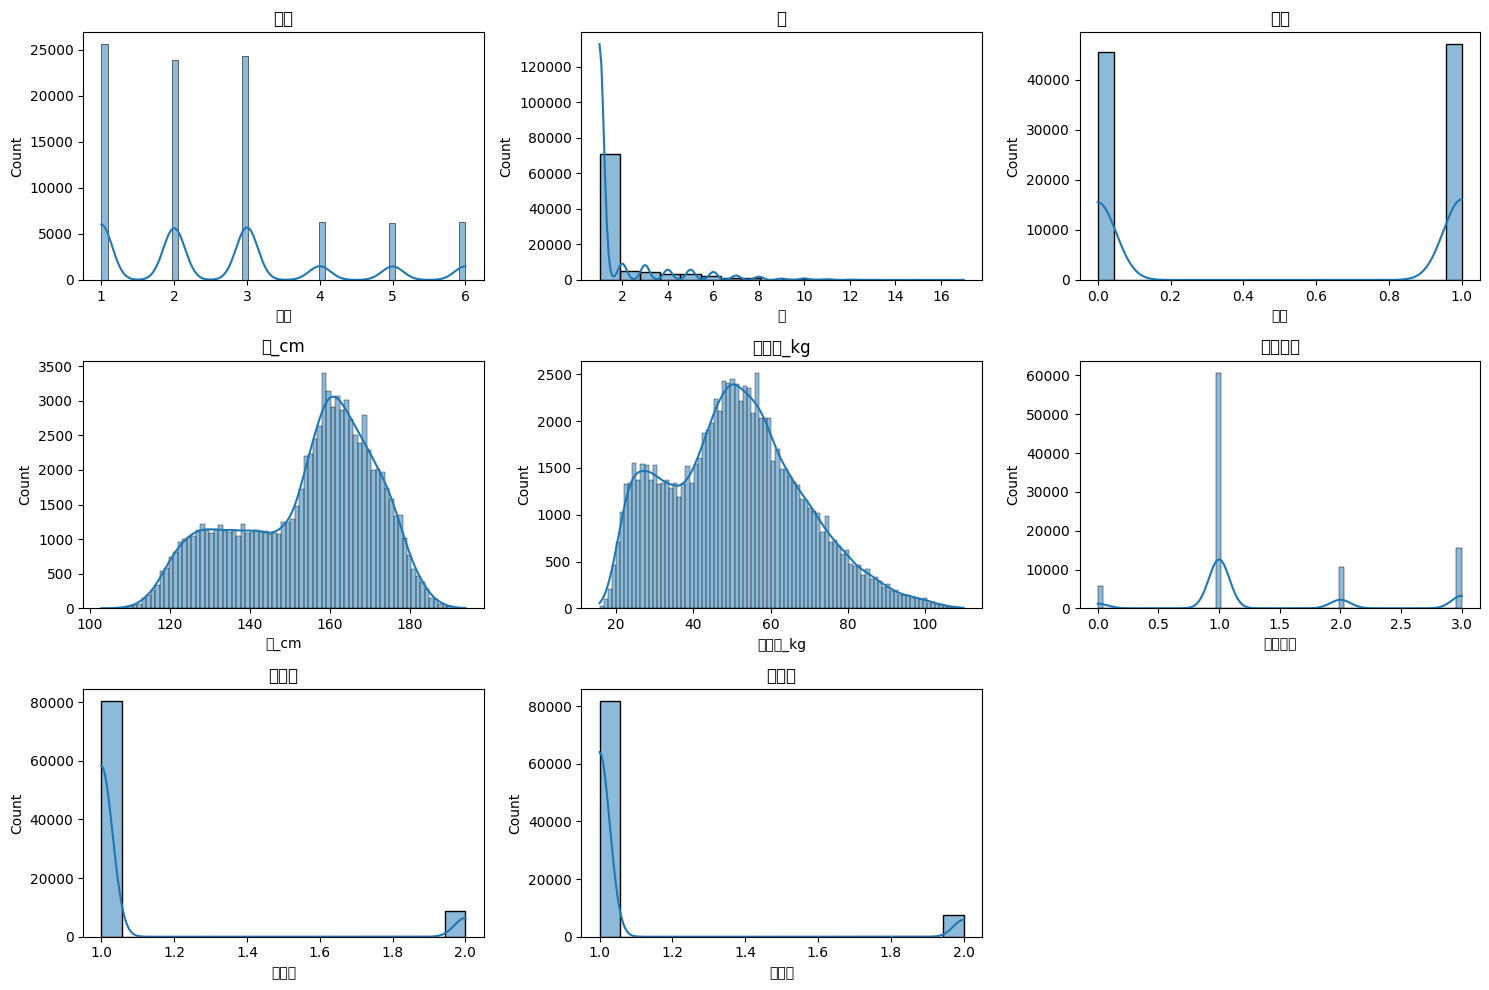

In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드
data = pd.read_csv("학생건강검사_2022년_원자료(극단치제거).csv")

# 성별을 0과 1로 변환
data['성별'] = data['성별'].replace({'여': 0, '남': 1})

# 비만 여부를 숫자로 변환
obesity_mapping = {'저체중': 0, '정상체중': 1, '과체중': 2, '비만': 3}
data['비만여부'] = data['비만여부'].map(obesity_mapping)

# 클러스터링을 위한 특성 선택
features = data[['학년', '반', '순번', '성별', '키_cm', '몸무게_kg', '비만여부', '손씻기', '양치질']]


# 빈 데이터 공간이 있을수 있어 NaN 값을 최빈값으로 대체하는 SimpleImputer 객체 생성
imputer = SimpleImputer(strategy='most_frequent')

# '손씻기'와 '양치질' 열의 NaN 값을 대체
features[['손씻기', '양치질']] = imputer.fit_transform(features[['손씻기', '양치질']])

# 클러스터링 수행
kmeans = KMeans(n_clusters=9, random_state=42)
clusters = kmeans.fit_predict(features)

# 결과 확인
data['Cluster'] = clusters
print(data[['학년', 'Cluster']].groupby('학년').mean())

#빈 컬럼을 찾아내기 위한 테스트 코드
#print(features.isnull().sum())


# 데이터 분포 시각화
plt.figure(figsize=(15, 10))
for i, feature in enumerate(['학년', '반', '성별', '키_cm', '몸무게_kg', '비만여부', '손씻기', '양치질']):
    plt.subplot(3, 3, i+1)
    sns.histplot(data[feature], kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()


/tmp/ipykernel_5675/4098114079.py:14: DtypeWarning: Columns (43,46,49) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("학생건강검사_2022년_원자료(극단치제거).csv", encoding='utf-8')
/tmp/ipykernel_5675/4098114079.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['성별'] = data['성별'].replace({'여': 0, '남': 1})


         학년         반        순번        성별      키_cm    몸무게_kg      비만여부  \
0 -0.008329  2.906015  0.131246 -0.265032  0.222812  0.105026 -0.133640   
1 -0.425637 -0.360290 -0.762501 -0.245275  0.574831  0.220614 -0.482337   
2 -0.055888 -0.246803 -0.036614  0.327046  0.587929  1.354156  1.702213   
3 -0.431025 -0.095053 -0.122231 -0.013316 -1.584277 -1.309543 -0.144575   
4 -0.416153 -0.359151  1.023581  0.021049  0.639894  0.284626 -0.462238   
5  0.113801 -0.050508 -0.016908  0.225416 -0.143915 -0.052388  0.124906   
6 -0.017445 -0.108120 -0.008853  0.343793  0.286109  0.357552  0.210564   
7  1.655241 -0.035997 -0.073864 -0.080047 -0.465958 -0.548605 -0.188769   
8 -0.141657 -0.142922  0.019645  0.165650  0.468941  0.406946  0.030836   

        손씻기       양치질  
0 -0.233636 -0.263663  
1 -0.325302 -0.295903  
2 -0.325302 -0.295583  
3 -0.321587 -0.295903  
4 -0.325302 -0.295903  
5 -0.325302  3.379482  
6  3.074070  3.379482  
7 -0.325302 -0.295903  
8  3.074070 -0.295903  


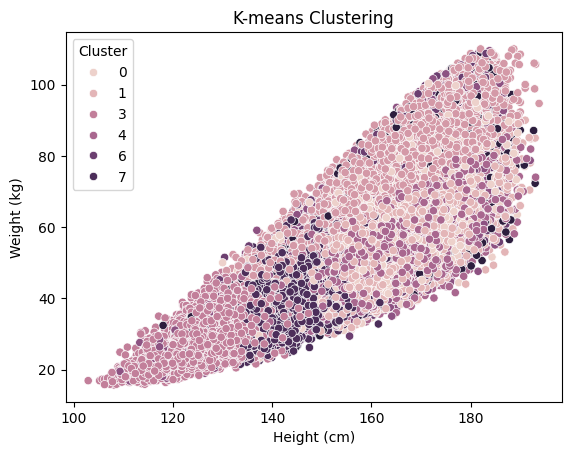

실루엣 점수: 0.20829384028990874


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import seaborn as sns

plt.rcParams['font.family'] = 'DejaVu Sans'  # 폰트 오류 방지를 위한 코드

# 데이터 로드
data = pd.read_csv("학생건강검사_2022년_원자료(극단치제거).csv", encoding='utf-8')

# 성별을 0과 1로 변환
data['성별'] = data['성별'].replace({'여': 0, '남': 1})

# 비만 여부를 숫자로 변환
obesity_mapping = {'저체중': 0, '정상체중': 1, '과체중': 2, '비만': 3}
data['비만여부'] = data['비만여부'].map(obesity_mapping)

# NaN 값을 최빈값으로 대체하는 SimpleImputer 객체 생성
imputer = SimpleImputer(strategy='most_frequent')
data[['손씻기', '양치질']] = imputer.fit_transform(data[['손씻기', '양치질']])

# 클러스터링을 위한 특성 선택
features = data[['학년', '반', '순번', '성별', '키_cm', '몸무게_kg', '비만여부', '손씻기', '양치질']]

# 데이터 정규화
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# K-means 클러스터링 수행
kmeans = KMeans(n_clusters=9, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# 각 클러스터의 중심점을 분석하고 특성을 설명
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=features.columns)
print(cluster_centers)

# 클러스터 시각화
data['Cluster'] = clusters
sns.scatterplot(x='키_cm', y='몸무게_kg', hue='Cluster', data=data)
plt.title('K-means Clustering')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

# 실루엣 점수 계산
silhouette_avg = silhouette_score(features_scaled, clusters)
print("실루엣 점수:", silhouette_avg)
